<a href="https://colab.research.google.com/github/MautKaFarishta/Simple-Data-Scince-Projects/blob/master/Full/AV_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb

# ***`Understanding the Data`***


*   Basic Stuff
*   Dealing with Null Values



In [204]:
data = pd.read_csv('train.csv')
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


From info() we came to know that there are null values in [Vintage,Credit_Product,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead]

In [206]:
data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


from describe we can Understand the statistical information of numerical variables.


---



In [207]:
data.tail() 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


Now Only 'Credit_Product' is having Null Value

In [209]:
print(data['Credit_Product'].unique())
data.isnull().sum(axis = 0)

['No' nan 'Yes']


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64



*   There are 29325 null values in 'Credit_Product' 
*   Can't remove this much of data because it is roughly more than 10% of data
* Let's Create a new catagory i.e 'Unknown'



In [210]:
data['Credit_Product'].fillna('Unknown',inplace = True)
data['Credit_Product'].value_counts()

No         144357
Yes         72043
Unknown     29325
Name: Credit_Product, dtype: int64

In [211]:
data.isnull().sum(axis = 0)

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

# ***`EDA`***


*   Visualizing Data



In [212]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


**Distribution of 'Age', 'Vintage', 'Avg_Account_Balance'**

---



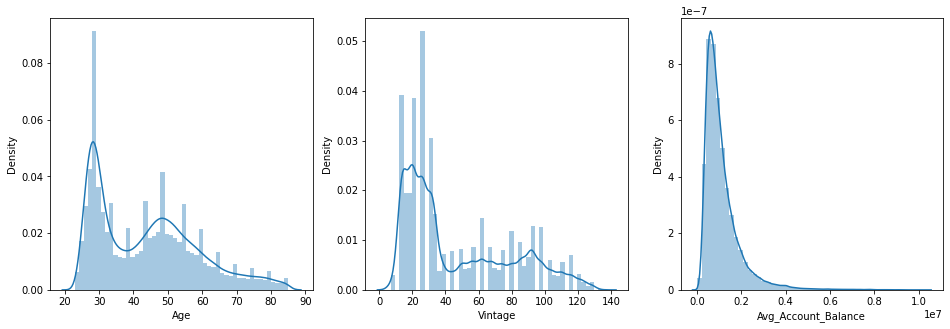

In [213]:
fig0, pl0 = plt.subplots(1,3,figsize=(16,5))

sns.distplot(data['Age'],ax=pl0[0])
sns.distplot(data['Vintage'],ax=pl0[1])
sns.distplot(data['Avg_Account_Balance'],ax=pl0[2])

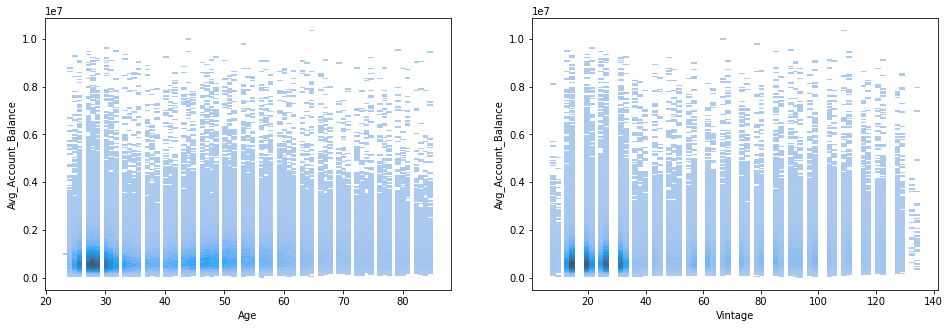

In [214]:
fig1, pl1 = plt.subplots(1,2,figsize=(16,5))

sns.histplot(data,x='Age',y='Avg_Account_Balance',ax=pl1[0],element='bars')
sns.histplot(data,x='Vintage',y='Avg_Account_Balance',ax=pl1[1],element='bars')

# Univariate Analysis -- "Gender"

---



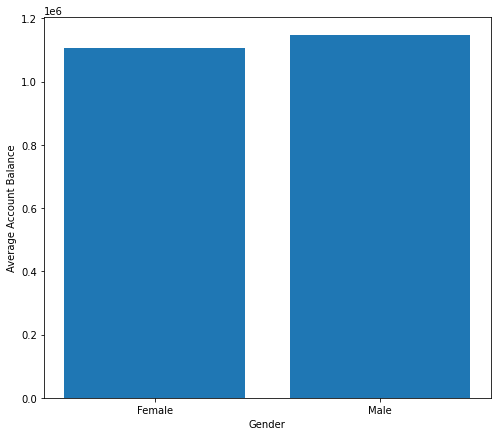

In [215]:
F_mean = data[data['Gender']=='Female']['Avg_Account_Balance'].mean()
M_mean = data[data['Gender']=='Male']['Avg_Account_Balance'].mean()

plt.figure(figsize=(8,7))

y3 = [F_mean,M_mean]
x3 = ['Female','Male']
plt.bar(x=x3,height=y3)
plt.xlabel('Gender')
plt.ylabel('Average Account Balance')
plt.show()

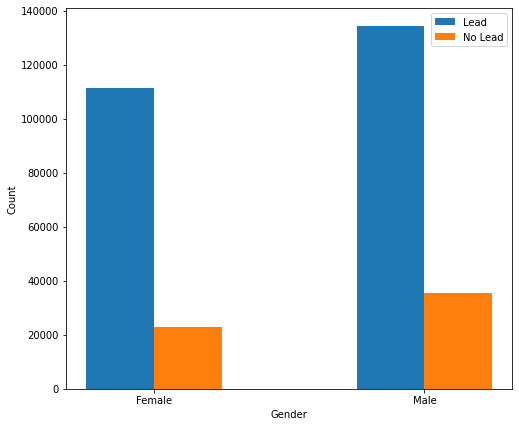

In [216]:
z=np.arange(2);w=0.25;r=np.arange(2)

F_c = data[data['Gender']=='Female']['Is_Lead'].count()
M_c = data[data['Gender']=='Male']['Is_Lead'].count()

F_cn =len(data[data['Gender']=='Female']) - data[data['Gender']=='Female']['Is_Lead'].value_counts()[0]
M_cn =len(data[data['Gender']=='Male']) - data[data['Gender']=='Male']['Is_Lead'].value_counts()[0]

plt.figure(figsize=(8,7))

y3_0 = [F_c,M_c]
y3_1 = [F_cn,M_cn]
x3 = ['Female','Male']
plt.bar(x=z,height=y3_0,width=w,label='Lead')
plt.bar(x=z+w,height=y3_1,width=w,label='No Lead')
plt.xticks(r + w/2,x3)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

Male      134197
Female    111528
Name: Gender, dtype: int64


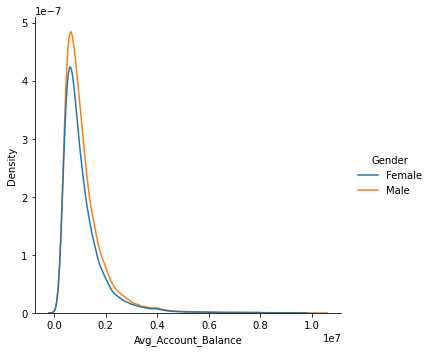

In [217]:
print(data['Gender'].value_counts())

sns.displot(data, x="Avg_Account_Balance", hue="Gender", kind="kde")

# Univariate Analysis -- 'Occupation'

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64


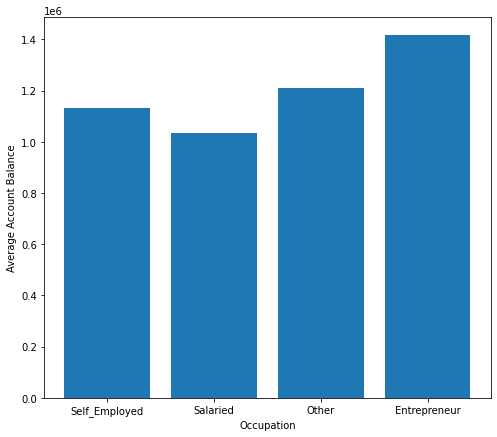

In [218]:
print(data['Occupation'].value_counts())

t=len(data)
SeE_mean = data[data['Occupation']=='Self_Employed']['Avg_Account_Balance'].mean()
Sal_mean = data[data['Occupation']=='Salaried']['Avg_Account_Balance'].mean()
Oth_mean = data[data['Occupation']=='Other']['Avg_Account_Balance'].mean()
Ent_mean = data[data['Occupation']=='Entrepreneur']['Avg_Account_Balance'].mean()

y2 = [SeE_mean,Sal_mean,Oth_mean,Ent_mean]
x2 = ['Self_Employed','Salaried','Other','Entrepreneur']
plt.figure(figsize=(8,7))
plt.bar(x=x2,height=y2)
plt.xlabel('Occupation')
plt.ylabel('Average Account Balance')
plt.show()

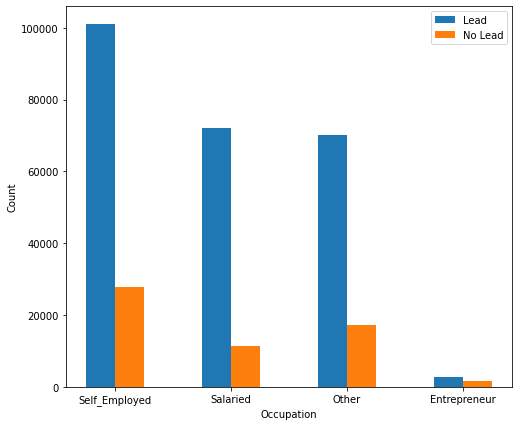

In [219]:
w=0.25
r = np.arange(4)

SeE_c = data[data['Occupation']=='Self_Employed']['Is_Lead'].count()
Sal_c = data[data['Occupation']=='Salaried']['Is_Lead'].count()
Oth_c = data[data['Occupation']=='Other']['Is_Lead'].count()
Ent_c = data[data['Occupation']=='Entrepreneur']['Is_Lead'].count()

SeE_cn = len(data[data['Occupation']=='Self_Employed'])-data[data['Occupation']=='Self_Employed']['Is_Lead'].value_counts()[0]
Sal_cn = len(data[data['Occupation']=='Salaried'])-data[data['Occupation']=='Salaried']['Is_Lead'].value_counts()[0]
Oth_cn = len(data[data['Occupation']=='Other'])-data[data['Occupation']=='Other']['Is_Lead'].value_counts()[0]
Ent_cn = len(data[data['Occupation']=='Entrepreneur'])-data[data['Occupation']=='Entrepreneur']['Is_Lead'].value_counts()[0]

y2_0 = [SeE_c,Sal_c,Oth_c,Ent_c]
y2_1 = [SeE_cn,Sal_cn,Oth_cn,Ent_cn]
x2 = ['Self_Employed','Salaried','Other','Entrepreneur']
plt.figure(figsize=(8,7))
plt.bar(x=r,height=y2_0,width=w,label = "Lead")
plt.bar(x=r+w,height=y2_1,width=w,label = "No Lead")
plt.xticks(r + w/2,x2)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend()
plt.show()

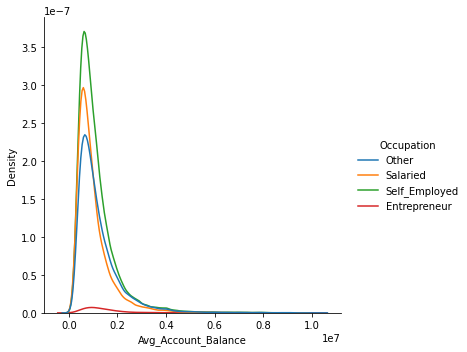

In [220]:
sns.displot(data, x="Avg_Account_Balance", hue="Occupation", kind="kde")

# Univariate Analysis -- 'Credit_Product'

In [221]:
print(data['Credit_Product'].value_counts())

No         144357
Yes         72043
Unknown     29325
Name: Credit_Product, dtype: int64


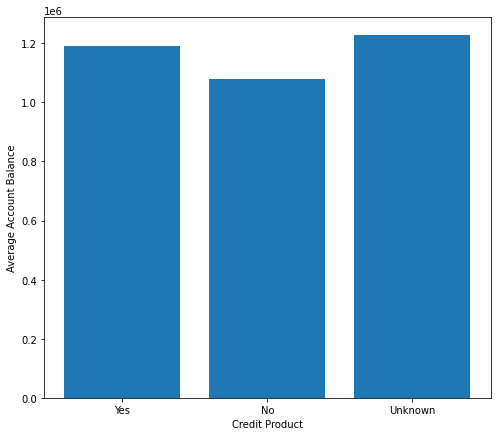

In [222]:
Y_mean = data[data['Credit_Product']=='Yes']['Avg_Account_Balance'].mean()
N_mean = data[data['Credit_Product']=='No']['Avg_Account_Balance'].mean()
U_mean = data[data['Credit_Product']=='Unknown']['Avg_Account_Balance'].mean()

y2 = [Y_mean,N_mean,U_mean]
x2 = ['Yes','No','Unknown']
plt.figure(figsize=(8,7))
plt.bar(x=x2,height=y2)
plt.xlabel('Credit Product')
plt.ylabel('Average Account Balance')
plt.show()

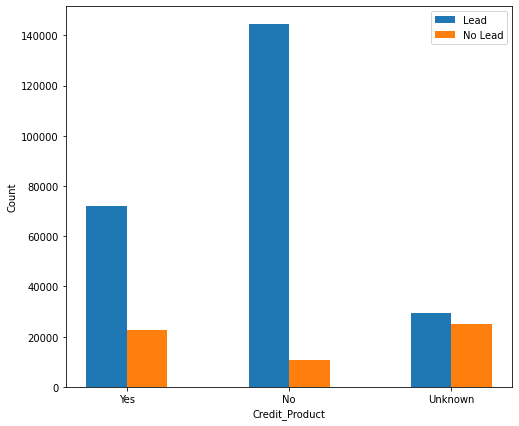

In [223]:
Y_c = data[data['Credit_Product']=='Yes']['Is_Lead'].count()
N_c = data[data['Credit_Product']=='No']['Is_Lead'].count()
U_c = data[data['Credit_Product']=='Unknown']['Is_Lead'].count()

Y_cn = len(data[data['Credit_Product']=='Yes']) - data[data['Credit_Product']=='Yes']['Is_Lead'].value_counts()[0]
N_cn = len(data[data['Credit_Product']=='No']) - data[data['Credit_Product']=='No']['Is_Lead'].value_counts()[0]
U_cn = len(data[data['Credit_Product']=='Unknown']) - data[data['Credit_Product']=='Unknown']['Is_Lead'].value_counts()[0]

y2_0 = [Y_c,N_c,U_c]
y2_1 = [Y_cn,N_cn,U_cn]
x2 = ['Yes','No','Unknown']
plt.figure(figsize=(8,7))
r = np.arange(3);w=0.25
plt.bar(x=r ,height=y2_0, width=w,label = 'Lead')
plt.bar(x=r+w ,height=y2_1, width=w,label = 'No Lead')
plt.xticks(r + w/2,x2)
plt.xlabel('Credit_Product')
plt.ylabel('Count')
plt.legend()
plt.show()

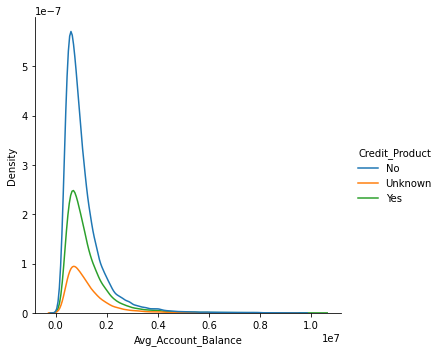

In [224]:
sns.displot(data, x="Avg_Account_Balance", hue="Credit_Product", kind="kde")

# Univariate Analysis -- 'Avg_Account_Balance'

In [225]:
data['Avg_Account_Balance'].mean()

1128403.1010194323

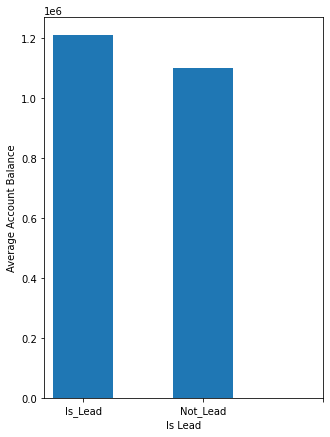

In [226]:
w = 0.5
X_tick = ['Is_Lead','Not_Lead']

x = np.arange(2)

y_IL = data[data['Is_Lead'] == 1.0]['Avg_Account_Balance'].mean()
y_NL = data[data['Is_Lead'] == 0.0]['Avg_Account_Balance'].mean()

y = [y_IL,y_NL]

plt.figure(figsize=(5,7))
plt.bar(x,y,width=w)
plt.xticks(r ,X_tick)
plt.xlabel('Is Lead')
plt.ylabel('Average Account Balance')
plt.show()

**Finding out If there is any relation between 'Age' 'Avg_Account_Balace' and 'Is_Lead'**

---



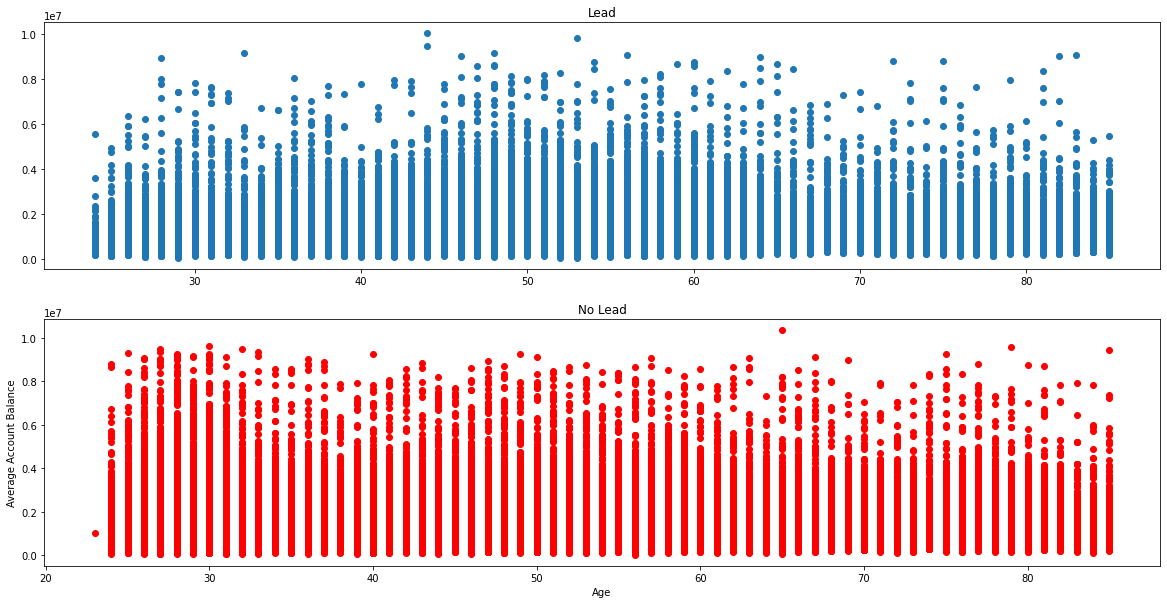

In [227]:
fig, pl = plt.subplots(2,1,figsize=(20,10))


x1 = data[data['Is_Lead']==1.0]['Age']
y1 = data[data['Is_Lead']==1.0]['Avg_Account_Balance']

pl[0].scatter(x1,y1)
pl[0].set_title('Lead')

x2 = data[data['Is_Lead']==0.0]['Age']
y2 = data[data['Is_Lead']==0.0]['Avg_Account_Balance']

pl[1].scatter(x2,y2,c='r')
pl[1].set_title('No Lead')

plt.xlabel('Age')
plt.ylabel('Average Account Balance')
plt.show()

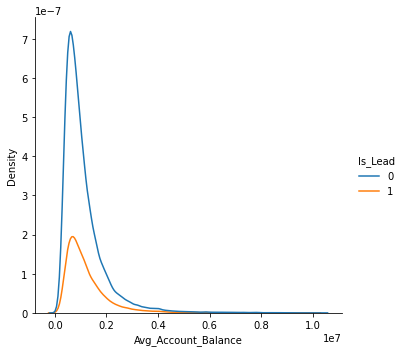

In [228]:
sns.displot(data, x='Avg_Account_Balance', hue="Is_Lead", kind="kde")

# Univariate Analysis -- 'Region_Code'

In [229]:
data['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [230]:
rgn_grp = data.groupby(by='Region_Code')

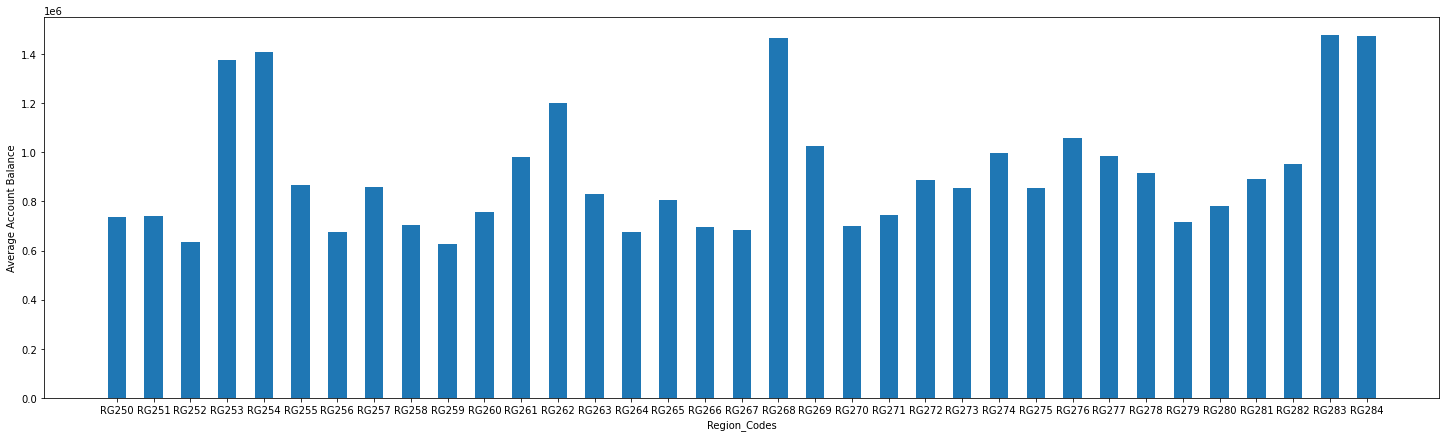

In [231]:
plt.figure(figsize=(25,7))
plt.bar(x=rgn_grp['Avg_Account_Balance'].mean().index,height=rgn_grp['Avg_Account_Balance'].mean(),width=w)
# plt.xticks(np.arange(35),data['Region_Code'].unique())
plt.xlabel('Region_Codes')
plt.ylabel('Average Account Balance')
plt.show()

In [232]:
rgn_lead_grp = data.groupby(by=['Region_Code','Is_Lead'])

In [233]:
rgn_data = rgn_lead_grp.size().unstack()

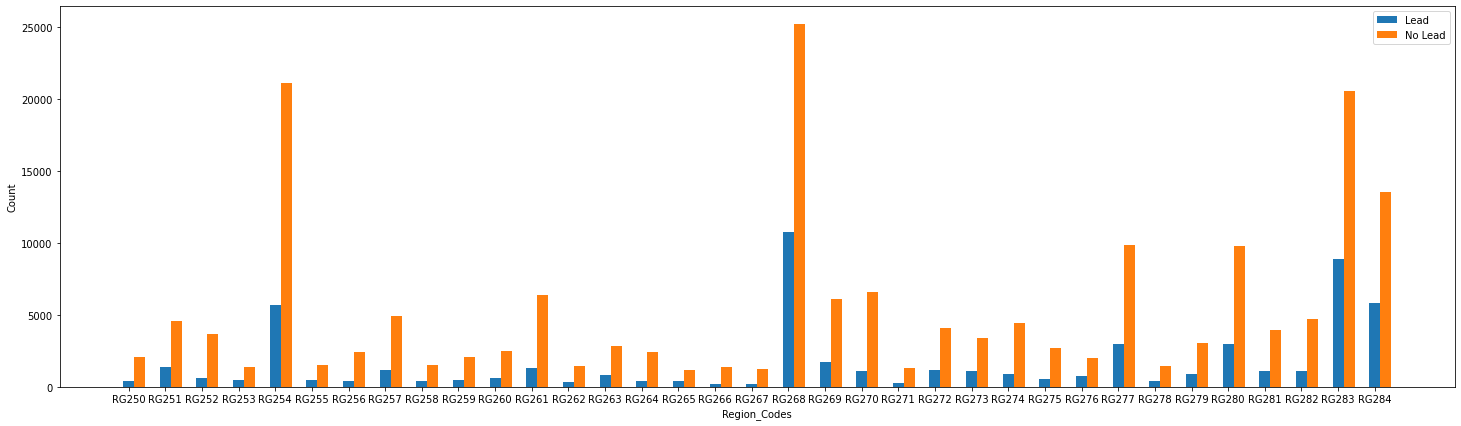

In [234]:
wid = 0.3

plt.figure(figsize=(25,7))
plt.bar(x=np.arange(35),height=rgn_data[1.0],width=wid,label='Lead')
plt.bar(x=np.arange(35)+wid,height=rgn_data[0.0],width=wid,label='No Lead')
plt.xticks(np.arange(35),rgn_data.index)
plt.xlabel('Region_Codes')
plt.ylabel('Count')
plt.legend()
plt.show()

# Univariate Analysis -- 'Channel_Code'

In [235]:
data['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

In [236]:
chn_grp = data.groupby(by='Channel_Code')

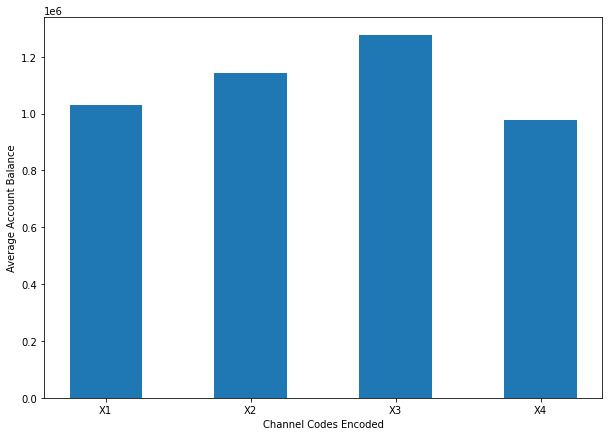

In [237]:
plt.figure(figsize=(10,7))
plt.bar(x=chn_grp['Avg_Account_Balance'].mean().index,height=chn_grp['Avg_Account_Balance'].mean(),width=w)
# plt.xticks(np.arange(35),data['Region_Code'].unique())
plt.xlabel('Channel Codes Encoded')
plt.ylabel('Average Account Balance')
plt.show()

In [238]:
chn_lead_grp = data.groupby(by=['Channel_Code','Is_Lead'])

In [239]:
chn_data = chn_lead_grp.size().unstack()

In [240]:
chn_data

Is_Lead,0,1
Channel_Code,,
X1,94236,9482
X2,45519,22207
X3,43493,25219
X4,4189,1380


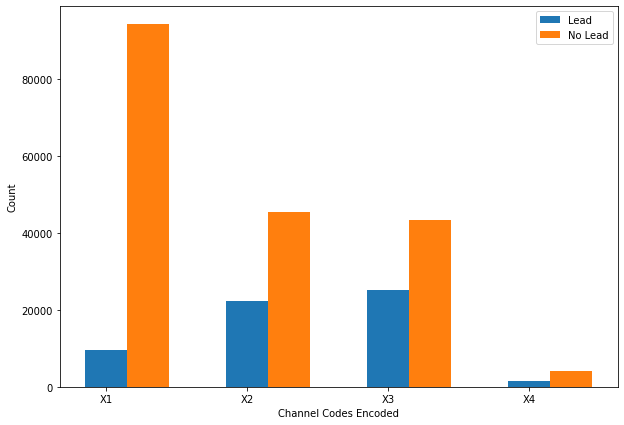

In [241]:
wid = 0.3

plt.figure(figsize=(10,7))
plt.bar(x=np.arange(4),height=chn_data[1.0],width=wid,label = 'Lead')
plt.bar(x=np.arange(4)+wid,height=chn_data[0.0],width=wid,label = 'No Lead')
plt.xticks(np.arange(4),chn_data.index)
plt.xlabel('Channel Codes Encoded')
plt.ylabel('Count')
plt.legend()
plt.show()

# ***Preparing Data***


1.   One Hot Encoding
2.   Response Coding



*   Up Sampling on Response coded data
*Up Sampling on One Hot Encoded Data

In [242]:
Xd = data.drop(['Is_Lead'],axis = 1)
yd = data['Is_Lead']

In [243]:
def oneHotEncoded(data,col):
  colm = data[col]
  new = pd.get_dummies(colm,drop_first=True)
  data = data.drop([col],axis=1)
  data = pd.concat([data, new], axis = 1)
  return data


In [244]:
Xd.drop(['ID'],inplace=True,axis=1)
Xd.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No


# One Hot Encoding

In [46]:
Xd = oneHotEncoded(Xd,'Gender')
Xd = oneHotEncoded(Xd,'Credit_Product')
Xd = oneHotEncoded(Xd,'Region_Code')
Xd = oneHotEncoded(Xd,'Channel_Code')
Xd = oneHotEncoded(Xd,'Occupation')
Xd = oneHotEncoded(Xd,'Is_Active')

In [47]:
Xd.head()

,Age,Vintage,Avg_Account_Balance,Male,Unknown,Yes,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284,X2,X3,X4,Other,Salaried,Self_Employed,Yes
0,73,43,1045696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,30,32,581988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,56,26,1484315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,34,19,470454,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,30,33,886787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


# UpSampling And OneHotEncoding

In [245]:
df_majority = data[data['Is_Lead']==0.0]
df_minority = data[data['Is_Lead']==1.0]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=187437,    # to match majority class
                                 random_state=123) # reproducible results
 

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 

df_upsampled.Is_Lead.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

In [250]:
Xdb = oneHotEncoded(df_upsampled,'Gender')
Xdb = oneHotEncoded(Xdb,'Credit_Product')
Xdb = oneHotEncoded(Xdb,'Region_Code')
Xdb = oneHotEncoded(Xdb,'Channel_Code')
Xdb = oneHotEncoded(Xdb,'Occupation')
Xdb = oneHotEncoded(Xdb,'Is_Active')
Xdb.head()

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Male,Unknown,Yes,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284,X2,X3,X4,Other,Salaried,Self_Employed,Yes
0,NNVBBKZB,73,43,1045696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,IDD62UNG,30,32,581988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,HD3DSEMC,56,26,1484315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,BF3NC7KV,34,19,470454,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,TEASRWXV,30,33,886787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [251]:
ydb = Xdb['Is_Lead']
Xdb = Xdb.drop(['Is_Lead'],axis = 1)

Xdb.drop(['ID'],inplace=True,axis=1)
Xdb.head()

,Age,Vintage,Avg_Account_Balance,Male,Unknown,Yes,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284,X2,X3,X4,Other,Salaried,Self_Employed,Yes
0,73,43,1045696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,30,32,581988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,56,26,1484315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,34,19,470454,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,30,33,886787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [179]:
Xdb.columns = ['Age', 'Vintage', 'Avg_Account_Balance', 'Male', 'Unknown', 'Yes0',
       'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257', 'RG258',
       'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265', 'RG266',
       'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273', 'RG274',
       'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281', 'RG282',
       'RG283', 'RG284', 'X2', 'X3', 'X4', 'Other', 'Salaried',
       'Self_Employed', 'Yes']
Xdb.head()

,Age,Vintage,Avg_Account_Balance,Male,Unknown,Yes0,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284,X2,X3,X4,Other,Salaried,Self_Employed,Yes
0,73,43,1045696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,30,32,581988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,56,26,1484315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,34,19,470454,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,30,33,886787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [48]:
Xr = data.drop(['Is_Lead'],axis = 1)
yr = data['Is_Lead']
Xr.drop(['ID'],inplace=True,axis=1)
Xr.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No


# Response Coding

In [49]:
def responseEncoded(d,col):
  dic={}
  for u in d[col].unique():
    
    dic[u]=len(d[d[col]==u])/len(d)
    # d['Channel_Code'].rep
  print(dic)
  d[col]=d[col].map(dic)
  return d

In [50]:
Xr = responseEncoded(Xr,'Gender')
Xr = responseEncoded(Xr,'Credit_Product')
Xr = responseEncoded(Xr,'Region_Code')
Xr = responseEncoded(Xr,'Channel_Code')
Xr = responseEncoded(Xr,'Occupation')
Xr = responseEncoded(Xr,'Is_Active')
Xr.head()

{'Female': 0.4538732322718486, 'Male': 0.5461267677281514}
{'No': 0.5874738020144471, 'Unknown': 0.11934072642181301, 'Yes': 0.29318547156374}
{'RG268': 0.14623664665784922, 'RG277': 0.052196561196459455, 'RG270': 0.0314172347136026, 'RG282': 0.02372164004476549, 'RG261': 0.031063180384576256, 'RG265': 0.006291586122698138, 'RG283': 0.11971105911079459, 'RG254': 0.10922779529962356, 'RG269': 0.03199918608200224, 'RG257': 0.024828568521721436, 'RG279': 0.016180689795503102, 'RG280': 0.05198901210703022, 'RG252': 0.017442262692033778, 'RG284': 0.07862447858378269, 'RG259': 0.01052395971105911, 'RG281': 0.02072642181300234, 'RG258': 0.007939770068165632, 'RG266': 0.006421813002340015, 'RG260': 0.012656424865194832, 'RG274': 0.021511852680842405, 'RG256': 0.011586122698138163, 'RG275': 0.013205819513683997, 'RG273': 0.018300946179672397, 'RG267': 0.006092176213246515, 'RG272': 0.02137348662122291, 'RG251': 0.024214060433411334, 'RG262': 0.007276426899989826, 'RG264': 0.011366364838742496, 

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0.453873,73,0.146237,0.285575,0.27963,43,0.587474,1045696,0.611619
1,0.453873,30,0.052197,0.293006,0.42209,32,0.587474,581988,0.611619
2,0.453873,56,0.146237,0.410565,0.27963,26,0.587474,1484315,0.388381
3,0.546127,34,0.031417,0.293006,0.42209,19,0.587474,470454,0.611619
4,0.453873,30,0.023722,0.293006,0.42209,33,0.587474,886787,0.611619


# UpSampling and ResponseCoding

In [112]:
Xrb = responseEncoded(df_upsampled,'Gender')
Xrb = responseEncoded(Xrb,'Credit_Product')
Xrb = responseEncoded(Xrb,'Region_Code')
Xrb = responseEncoded(Xrb,'Channel_Code')
Xrb = responseEncoded(Xrb,'Occupation')
Xrb = responseEncoded(Xrb,'Is_Active')

{'Female': 0.4315956828160929, 'Male': 0.5684043171839072}
{'No': 0.44689415643656266, 'Yes': 0.326493701883833, 'Unknown': 0.22661214167960433}
{'RG268': 0.15965364362425774, 'RG277': 0.05123321436002497, 'RG270': 0.027491903946392653, 'RG282': 0.0220847538106137, 'RG261': 0.027929384273115768, 'RG265': 0.00645550238213373, 'RG283': 0.13074793130491846, 'RG254': 0.10552879100711172, 'RG269': 0.03127450823476688, 'RG257': 0.023597262013369827, 'RG279': 0.016144091081269973, 'RG280': 0.052020145435533, 'RG252': 0.014858325730778875, 'RG284': 0.08500989665861063, 'RG259': 0.009803293906752669, 'RG281': 0.02030548931107519, 'RG258': 0.007589216643458869, 'RG266': 0.005508517528556261, 'RG260': 0.011793295880749266, 'RG274': 0.01946253941324285, 'RG256': 0.010070050203535054, 'RG275': 0.01186532008088051, 'RG273': 0.018310152211142943, 'RG267': 0.0052364261058382286, 'RG272': 0.02092969904554597, 'RG251': 0.02423480956267973, 'RG262': 0.006698250612205701, 'RG264': 0.009744607521460544, 'R

In [114]:
yrb = Xrb['Is_Lead']
Xrb = Xrb.drop(['Is_Lead'],axis = 1)

Xrb.drop(['ID'],inplace=True,axis=1)
Xrb.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0.431596,73,0.159654,0.288854,0.332264,43,0.446894,1045696,0.58565
1,0.431596,30,0.051233,0.260234,0.332469,32,0.446894,581988,0.58565
2,0.431596,56,0.159654,0.433492,0.332264,26,0.446894,1484315,0.41435
3,0.568404,34,0.027492,0.260234,0.332469,19,0.446894,470454,0.58565
4,0.431596,30,0.022085,0.260234,0.332469,33,0.446894,886787,0.58565


# Training

In [51]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.20, random_state=41)

In [52]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.20, random_state=41)

In [116]:
Xrb_train, Xrb_test, yrb_train, yrb_test = train_test_split(Xrb, yrb, test_size=0.20, random_state=41)

In [182]:
Xdb_train, Xdb_test, ydb_train, ydb_test = train_test_split(Xdb, ydb, test_size=0.20, random_state=41)

In [53]:
def score(tr,pr):
  print('Accuracy      - ',accuracy_score(tr,pr))
  print('roc_auc_score - ',roc_auc_score(tr,pr))

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [54]:
# demo = DecisionTreeClassifier()
# demo.fit(Xd_train,yd_train)

In [55]:
# score(yd_test,demo.predict(Xd_test))
# score(yd_train,demo.predict(Xd_train))

In [56]:
# demo2 = RandomForestClassifier()
# demo2.fit(Xd_train,yd_train)

In [57]:
# score(yd_test,demo2.predict(Xd_test))
# score(yd_train,demo2.predict(Xd_train))

In [58]:
# param_grid = {'class_weight':[{0: 3.2, 1: 5}],
#               'min_samples_split':[20,30],
#               'n_estimators':[300,500]
#               }

# model = RandomForestClassifier()
# GridModel = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=4)

In [59]:
# GridModel.fit(Xr_train,yr_train)

In [60]:
# GridModel.best_params_

In [72]:
RF = RandomForestClassifier(class_weight={0: 3.2, 1: 5},min_samples_split=50,n_estimators=1000)
RF.fit(Xd_train,yd_train)
score(yd_test,RF.predict(Xd_test))
score(yd_train,RF.predict(Xd_train))

Accuracy      -  0.8579306134906908
roc_auc_score -  0.7762726759651517
Accuracy      -  0.8821294129616442
roc_auc_score -  0.8126673907461004


In [75]:
RF2 = RandomForestClassifier(class_weight={0: 3.2, 1: 5},min_samples_split=50,n_estimators=1000)
RF2.fit(Xr_train,yr_train)
score(yr_test,RF2.predict(Xr_test))
score(yr_train,RF2.predict(Xr_train))

Accuracy      -  0.8563434733950555
roc_auc_score -  0.7822624528334359
Accuracy      -  0.8779479092481433
roc_auc_score -  0.8134722838785052


In [66]:
param_grid = {'learning_rate':[0.05,0.2],
              'min_samples_split':[20,30],
              'n_estimators':[300,500,1000],
              'subsample':[0.6,1],
              'min_samples_split':[4,8],
              'warm_start':[True]
              }

model = GradientBoostingClassifier()
GridModel = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=4)

In [67]:
GridModel.fit(Xr_train,yr_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=0.6, warm_start=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=0.6, warm_start=True, score=0.875, total=  38.1s
[CV] learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=0.6, warm_start=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.1s remaining:    0.0s


[CV]  learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=0.6, warm_start=True, score=0.873, total=  38.2s
[CV] learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=0.6, warm_start=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV]  learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=0.6, warm_start=True, score=0.871, total=  38.2s
[CV] learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=1, warm_start=True 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s


[CV]  learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=1, warm_start=True, score=0.875, total=  50.4s
[CV] learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=1, warm_start=True 
[CV]  learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=1, warm_start=True, score=0.873, total=  50.7s
[CV] learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=1, warm_start=True 
[CV]  learning_rate=0.05, min_samples_split=4, n_estimators=300, subsample=1, warm_start=True, score=0.871, total=  50.7s
[CV] learning_rate=0.05, min_samples_split=4, n_estimators=500, subsample=0.6, warm_start=True 
[CV]  learning_rate=0.05, min_samples_split=4, n_estimators=500, subsample=0.6, warm_start=True, score=0.875, total= 1.0min
[CV] learning_rate=0.05, min_samples_split=4, n_estimators=500, subsample=0.6, warm_start=True 
[CV]  learning_rate=0.05, min_samples_split=4, n_estimators=500, subsample=0.6, warm_start=True, score=0.873, total= 1.0min
[CV] l

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 105.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [68]:
GridModel.best_params_

{'learning_rate': 0.05,
 'min_samples_split': 4,
 'n_estimators': 500,
 'subsample': 1,
 'warm_start': True}

In [71]:
GBDT = GradientBoostingClassifier(min_samples_split=4, learning_rate=0.05, n_estimators=1000)
GBDT.fit(Xr_train,yr_train)
score(yr_test,GBDT.predict(Xr_test))
score(yr_train,GBDT.predict(Xr_train))

Accuracy      -  0.8610235018821853
roc_auc_score -  0.7508975039496456
Accuracy      -  0.8628141214772612
roc_auc_score -  0.7546226681703615


In [98]:
XGB1 = xgb.XGBClassifier()
XGB1.fit(Xd_train.to_numpy(), yd_train)
score(yd_test,XGB1.predict(Xd_test.to_numpy()))
score(yd_train,XGB1.predict(Xd_train.to_numpy()))

Accuracy      -  0.8605554990334724
roc_auc_score -  0.7462430209520171
Accuracy      -  0.8602757147217418
roc_auc_score -  0.747361352391047


In [99]:
XGB2 = xgb.XGBClassifier()
XGB2.fit(Xr_train.to_numpy(), yr_train)
score(yr_test,XGB2.predict(Xr_test.to_numpy()))
score(yr_train,XGB2.predict(Xr_train.to_numpy()))

Accuracy      -  0.8601281920846475
roc_auc_score -  0.7451890164358117
Accuracy      -  0.8598433207854309
roc_auc_score -  0.7462076958268715


In [105]:
param_grid = {'eta':[0.05,0.1,0.2],
              'n_estimators':[100,300,500],
              'subsample':[0.6,1],
              'max_depth':[4,8,12]
              }

model = xgb.XGBClassifier()
GridModel = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=4)

In [117]:
GridModel.fit(Xrb_train,yrb_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] eta=0.05, max_depth=4, n_estimators=100, subsample=0.6 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  eta=0.05, max_depth=4, n_estimators=100, subsample=0.6, score=0.876, total=  16.5s
[CV] eta=0.05, max_depth=4, n_estimators=100, subsample=0.6 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s


[CV]  eta=0.05, max_depth=4, n_estimators=100, subsample=0.6, score=0.877, total=  16.2s
[CV] eta=0.05, max_depth=4, n_estimators=100, subsample=0.6 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.7s remaining:    0.0s


[CV]  eta=0.05, max_depth=4, n_estimators=100, subsample=0.6, score=0.876, total=  16.3s
[CV] eta=0.05, max_depth=4, n_estimators=100, subsample=1 ............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.0s remaining:    0.0s


[CV]  eta=0.05, max_depth=4, n_estimators=100, subsample=1, score=0.875, total=  14.0s
[CV] eta=0.05, max_depth=4, n_estimators=100, subsample=1 ............
[CV]  eta=0.05, max_depth=4, n_estimators=100, subsample=1, score=0.877, total=  13.7s
[CV] eta=0.05, max_depth=4, n_estimators=100, subsample=1 ............
[CV]  eta=0.05, max_depth=4, n_estimators=100, subsample=1, score=0.876, total=  13.9s
[CV] eta=0.05, max_depth=4, n_estimators=300, subsample=0.6 ..........
[CV]  eta=0.05, max_depth=4, n_estimators=300, subsample=0.6, score=0.879, total=  46.6s
[CV] eta=0.05, max_depth=4, n_estimators=300, subsample=0.6 ..........
[CV]  eta=0.05, max_depth=4, n_estimators=300, subsample=0.6, score=0.880, total=  46.8s
[CV] eta=0.05, max_depth=4, n_estimators=300, subsample=0.6 ..........
[CV]  eta=0.05, max_depth=4, n_estimators=300, subsample=0.6, score=0.880, total=  46.8s
[CV] eta=0.05, max_depth=4, n_estimators=300, subsample=1 ............
[CV]  eta=0.05, max_depth=4, n_estimators=300,

KeyboardInterrupt: ignored

# ***`Final Model Testing`***

In [260]:
XGB3 = xgb.XGBClassifier(eta=0.1,n_estimators=500,subsample=0.6,max_depth=15)
XGB3.fit(Xdb_train.to_numpy(), ydb_train)
score(ydb_test,XGB3.predict(Xdb_test.to_numpy()))
score(ydb_train,XGB3.predict(Xdb_train.to_numpy()))

Accuracy      -  0.9152650883627876
roc_auc_score -  0.9153501456130138
Accuracy      -  0.9812003374469405
roc_auc_score -  0.9812014549748287


In [261]:
score(yd_test,XGB3.predict(Xd_test.to_numpy()))
score(yd_train,XGB3.predict(Xd_train.to_numpy()))

Accuracy      -  0.9584087903143759
roc_auc_score -  0.9510675098032376
Accuracy      -  0.9574422626920338
roc_auc_score -  0.9496767506665019


# ***`Final Model`***

**Training Final Model**

In [287]:
XGB3 = xgb.XGBClassifier(eta=0.1,n_estimators=500,subsample=0.6,max_depth=15)
XGB3.fit(Xdb.to_numpy(), ydb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [288]:
print(score(ydb,XGB3.predict(Xdb.to_numpy())))
print(score(ydb_train,XGB3.predict(Xdb_train.to_numpy())))
print(score(ydb_test,XGB3.predict(Xdb_test.to_numpy())))

Accuracy      -  0.9811883459509062
roc_auc_score -  0.9811883459509061
None
Accuracy      -  0.98119033407914
roc_auc_score -  0.9811893216612143
None
Accuracy      -  0.9811803934644882
roc_auc_score -  0.9811850118938105
None


**Creating final data**

In [293]:
test = pd.read_csv('test.csv')
IDs = test['ID']
test.drop(['ID'],axis=1,inplace=True)
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [294]:
test['Credit_Product'].fillna('Unknown',inplace = True)
test['Credit_Product'].value_counts()

No         61608
Yes        31182
Unknown    12522
Name: Credit_Product, dtype: int64

In [295]:
test_final = oneHotEncoded(test,'Gender')
test_final = oneHotEncoded(test_final,'Credit_Product')
test_final = oneHotEncoded(test_final,'Region_Code')
test_final = oneHotEncoded(test_final,'Channel_Code')
test_final = oneHotEncoded(test_final,'Occupation')
test_final = oneHotEncoded(test_final,'Is_Active')
test_final.head()

,Age,Vintage,Avg_Account_Balance,Male,Unknown,Yes,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284,X2,X3,X4,Other,Salaried,Self_Employed,Yes
0,29,25,742366,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,43,49,925537,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,31,14,215949,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,29,33,868070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,29,19,657087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [296]:
test_final.columns = ['Age', 'Vintage', 'Avg_Account_Balance', 'Male', 'Unknown', 'Yes0',
       'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257', 'RG258',
       'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265', 'RG266',
       'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273', 'RG274',
       'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281', 'RG282',
       'RG283', 'RG284', 'X2', 'X3', 'X4', 'Other', 'Salaried',
       'Self_Employed', 'Yes']
test_final.head()

,Age,Vintage,Avg_Account_Balance,Male,Unknown,Yes0,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284,X2,X3,X4,Other,Salaried,Self_Employed,Yes
0,29,25,742366,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,43,49,925537,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,31,14,215949,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,29,33,868070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,29,19,657087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [297]:
pred = XGB3.predict(test_final.to_numpy())

In [298]:
print(len(IDs))
len(pred)

105312


105312

In [300]:
result = pd.DataFrame(pd.np.column_stack([IDs,pred]),columns=['ID','Is_Lead'])

In [299]:
result.to_csv('final_sub.csv', index=False)

# ***`Summarizing Results`***